In [25]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import quad
from matplotlib import colormaps
from tqdm import tqdm

In [2]:
# Define the system to be solved

def r(t):
    return r0 * (1 + epsilon * np.cos((2 * np.pi * (t-psi))/gamma))

def dudt(t,u):
    return ((r(t) * u**2)/(k + u**2)) - (dh * u)

#### Run the system over a range of initial conditions and compare to the paper for different parameter values

In [16]:
# Set the system parameters

# Birth rate parameters
epsilon = 0
psi = 0
gamma = 100
r0 = 1

# Population dynamics parameters
k = 1/4
dh = 0.5

# Minimum growth rate for colony survival
r0min = 2 * dh * np.sqrt(k)

# Initial condition range
u0min = 0
u0max = 3
du0 = 0.1
u0Range = np.arange(u0min, u0max, du0)

# Fixed points
uStar1 = (r0 + np.sqrt(r0**2 - 4*(dh**2)*k))/(2*dh)
uStar2 = (r0 - np.sqrt(r0**2 - 4*(dh**2)*k))/(2*dh)
print("Fixed points: u*_1 = " + str(uStar1) + ", u*_2 = " + str(uStar2))

Fixed points: u*_1 = 1.8660254037844386, u*_2 = 0.1339745962155614


In [17]:
tMin = 0
tMax = 30
dt = 0.2
tAxis = np.arange(tMin,tMax,dt)

uSolns = [np.zeros(len(tAxis)) for i in range(0,len(u0Range))]

for i in range(0,len(u0Range)):
    u0 = u0Range[i]
    ivpSol = solve_ivp(dudt, [tMin,tMax], [u0], t_eval=tAxis)
    uSolns[i] = ivpSol.y[0]

r0 must > 2dh sqrt(k) = 0.5
Below this the colony collapses for all u0


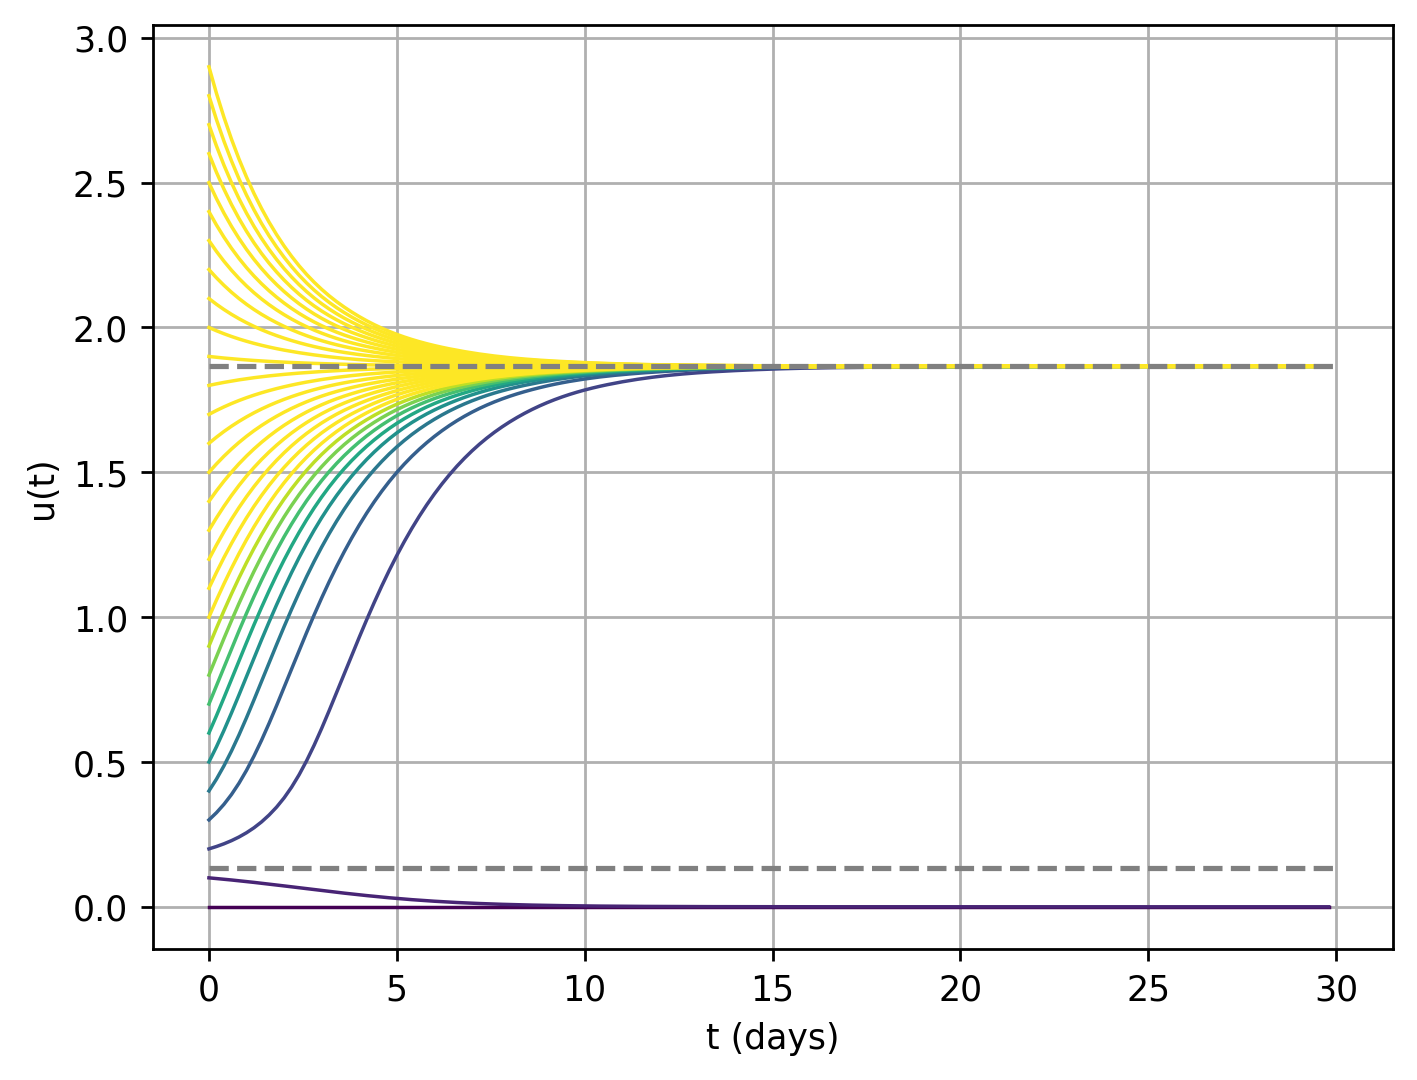

In [21]:
cmap = plt.get_cmap("viridis")
plt.figure(dpi=250)
for uSoln in uSolns:
    plt.plot(tAxis,uSoln, linewidth=1, color=cmap(uSoln[0]))
    
plt.hlines([uStar1,uStar2],tMin,tMax, linestyle="dashed", color="gray")
    
plt.grid()
plt.ylabel("u(t)")
plt.xlabel("t (days)")
#plt.title("u* = " +str(round(uStar1,3)) + ", " + str(round(uStar2,3)))

print("r0 must > 2dh sqrt(k) = " + str(r0min))
print("Below this the colony collapses for all u0")



## Create Basins of Attraction

Reproduce the paper results for u0 vs epsilon

In [22]:
# Birth rate parameters
psi = 0
gamma = 4

# Population dynamics parameters
k = 1/4
dh = 1/2

# Set r0 relative to the minimum for survival from Prop 1
r0min = 2 * dh * np.sqrt(k)
r0 = 3*(r0min)
r0 = 1

print("r0 = " + str(r0))
print("r0min = 2 dh sqrtK = " + str(r0min))

r0 = 1
r0min = 2 dh sqrtK = 0.5


In [27]:
# Set up the 2D array to store survival or collapse
gridHeight = 100
gridWidth = 100

phaseSpaceGrid = np.zeros([gridHeight, gridWidth])

# Set up parameter ranges for the axes
u0max = 0.4
u0min = 0
u0Range = np.arange(u0min,u0max,(u0max-u0min)/gridWidth)

epsilonmax = 1
epsilonmin = 0
epsilonRange = np.arange(epsilonmin,epsilonmax,(epsilonmax-epsilonmin)/gridWidth)

# Set how long to run the simulation for at each grid point
tMin = 0
tMax = 500
dt = 0.1
tMaxIndex = tMax/dt
tAxis = np.arange(tMin,tMax,dt)

In [28]:
for i in tqdm(range(len(epsilonRange))):
    # Create empty array to store the current row
    uSolns = [np.zeros(len(tAxis)) for i in range(0,len(u0Range))]
    
    epsilon = epsilonRange[i]
    
    # Run simulation for each u0 and store the results in the empty array
    for ii in range(0,len(u0Range)):
        u0 = u0Range[ii]
        ivpSol = solve_ivp(dudt, [tMin,tMax], [u0Range[ii]], t_eval=tAxis)
        uSolns[ii] = ivpSol.y[0]
            
    # Loop through the current column and set the value of the final grid according to survival or collapse
    for j in range(len(uSolns)):
        
        if uSolns[j][int(tMaxIndex)-1] > 0.1:
            phaseSpaceGrid[-i-1,j] = True
        else:
            phaseSpaceGrid[-i-1,j] = False

100%|█████████████████████████████████████████| 100/100 [04:08<00:00,  2.49s/it]


Text(0, 0.5, 'Intensity of seasonality, ε')

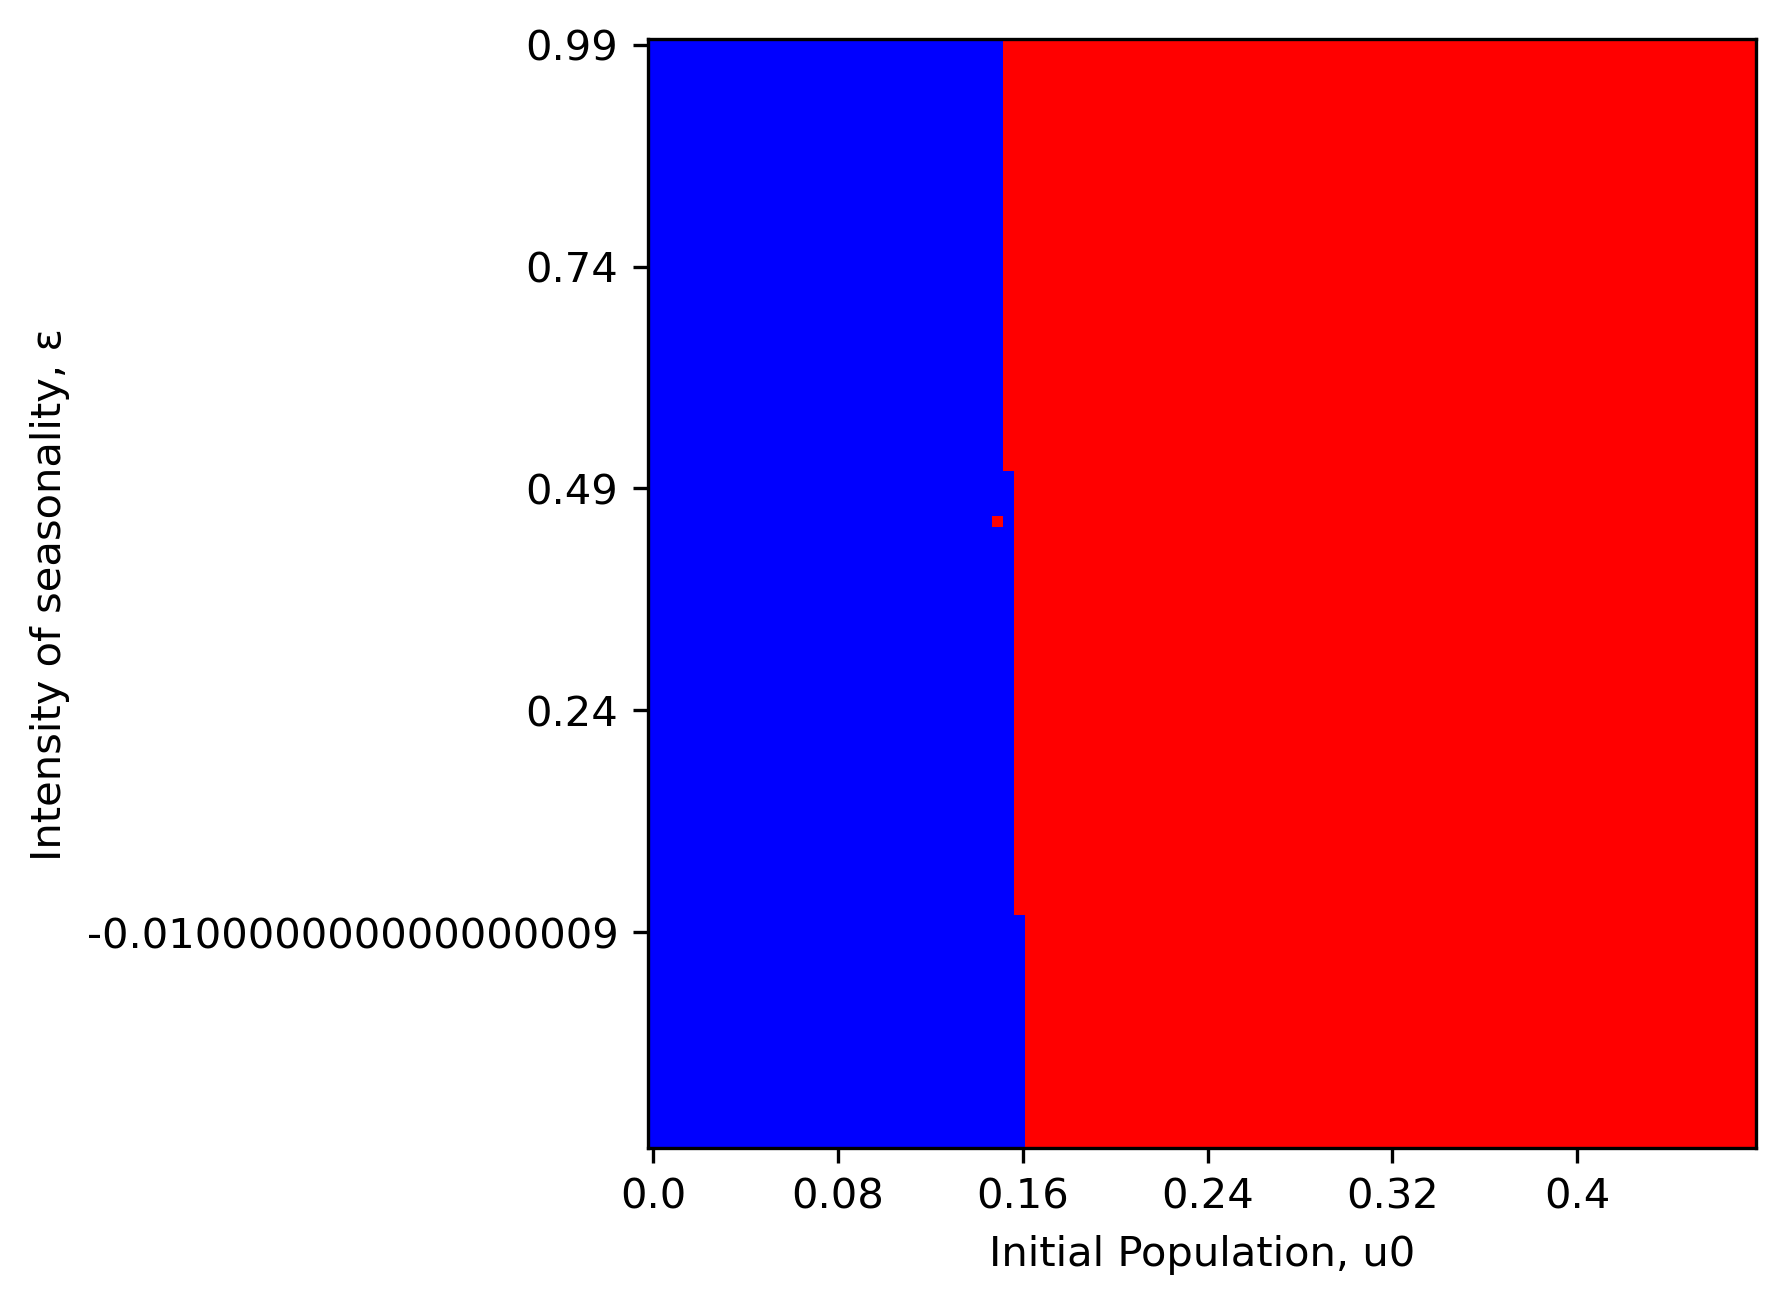

In [42]:
# Display the grid above
plt.figure(dpi=300)
plt.imshow(phaseSpaceGrid, interpolation='nearest', cmap="bwr")

numxTicks = 6
numyTicks = 5
plt.xticks(np.arange(0, gridWidth, gridWidth/numxTicks), np.linspace(u0min,u0max,numxTicks));
plt.yticks(np.arange(0, gridHeight, gridHeight/numyTicks), epsilon-np.linspace(epsilonmin,epsilonmax,numyTicks));

plt.xlabel("Initial Population, u0")
plt.ylabel("Intensity of seasonality, ε")

## Plots for other parameters
Start with r0 vs epsilon

In [48]:
# Birth rate parameters
psi = 0
gamma = 4

# Population dynamics parameters
k = 1/4
dh = 1/2

# Set r0 relative to the minimum for survival from Prop 1
r0minForSurvival = 2 * dh * np.sqrt(k)

u0 = 0.13

In [50]:
# Set up the 2D array to store survival or collapse
gridHeight = 100
gridWidth = 100

phaseSpaceGrid = np.zeros([gridHeight, gridWidth])

# Set up parameter ranges for the axes
r0max = 2
r0min = 0
r0Range = np.arange(r0min,r0max,(r0max-r0min)/gridWidth)

epsilonmax = 1
epsilonmin = 0
epsilonRange = np.arange(epsilonmin,epsilonmax,(epsilonmax-epsilonmin)/gridWidth)

# Set how long to run the simulation for at each grid point
tMin = 0
tMax = 500
dt = 0.1
tMaxIndex = tMax/dt
tAxis = np.arange(tMin,tMax,dt)

In [51]:
for i in tqdm(range(len(epsilonRange))):
    # Create empty array to store the current row
    uSolns = [np.zeros(len(tAxis)) for i in range(0,len(r0Range))]
    
    epsilon = epsilonRange[i]
    
    # Run simulation for each u0 and store the results in the empty array
    for ii in range(0,len(r0Range)):
        r0 = r0Range[ii]
        ivpSol = solve_ivp(dudt, [tMin,tMax], [u0], t_eval=tAxis)
        uSolns[ii] = ivpSol.y[0]
            
    # Loop through the current column and set the value of the final grid according to survival or collapse
    for j in range(len(uSolns)):
        
        if uSolns[j][int(tMaxIndex)-1] > 0.1:
            phaseSpaceGrid[-i-1,j] = True
        else:
            phaseSpaceGrid[-i-1,j] = False

100%|█████████████████████████████████████████| 100/100 [03:51<00:00,  2.31s/it]


Text(0, 0.5, 'Intensity of seasonality, ε')

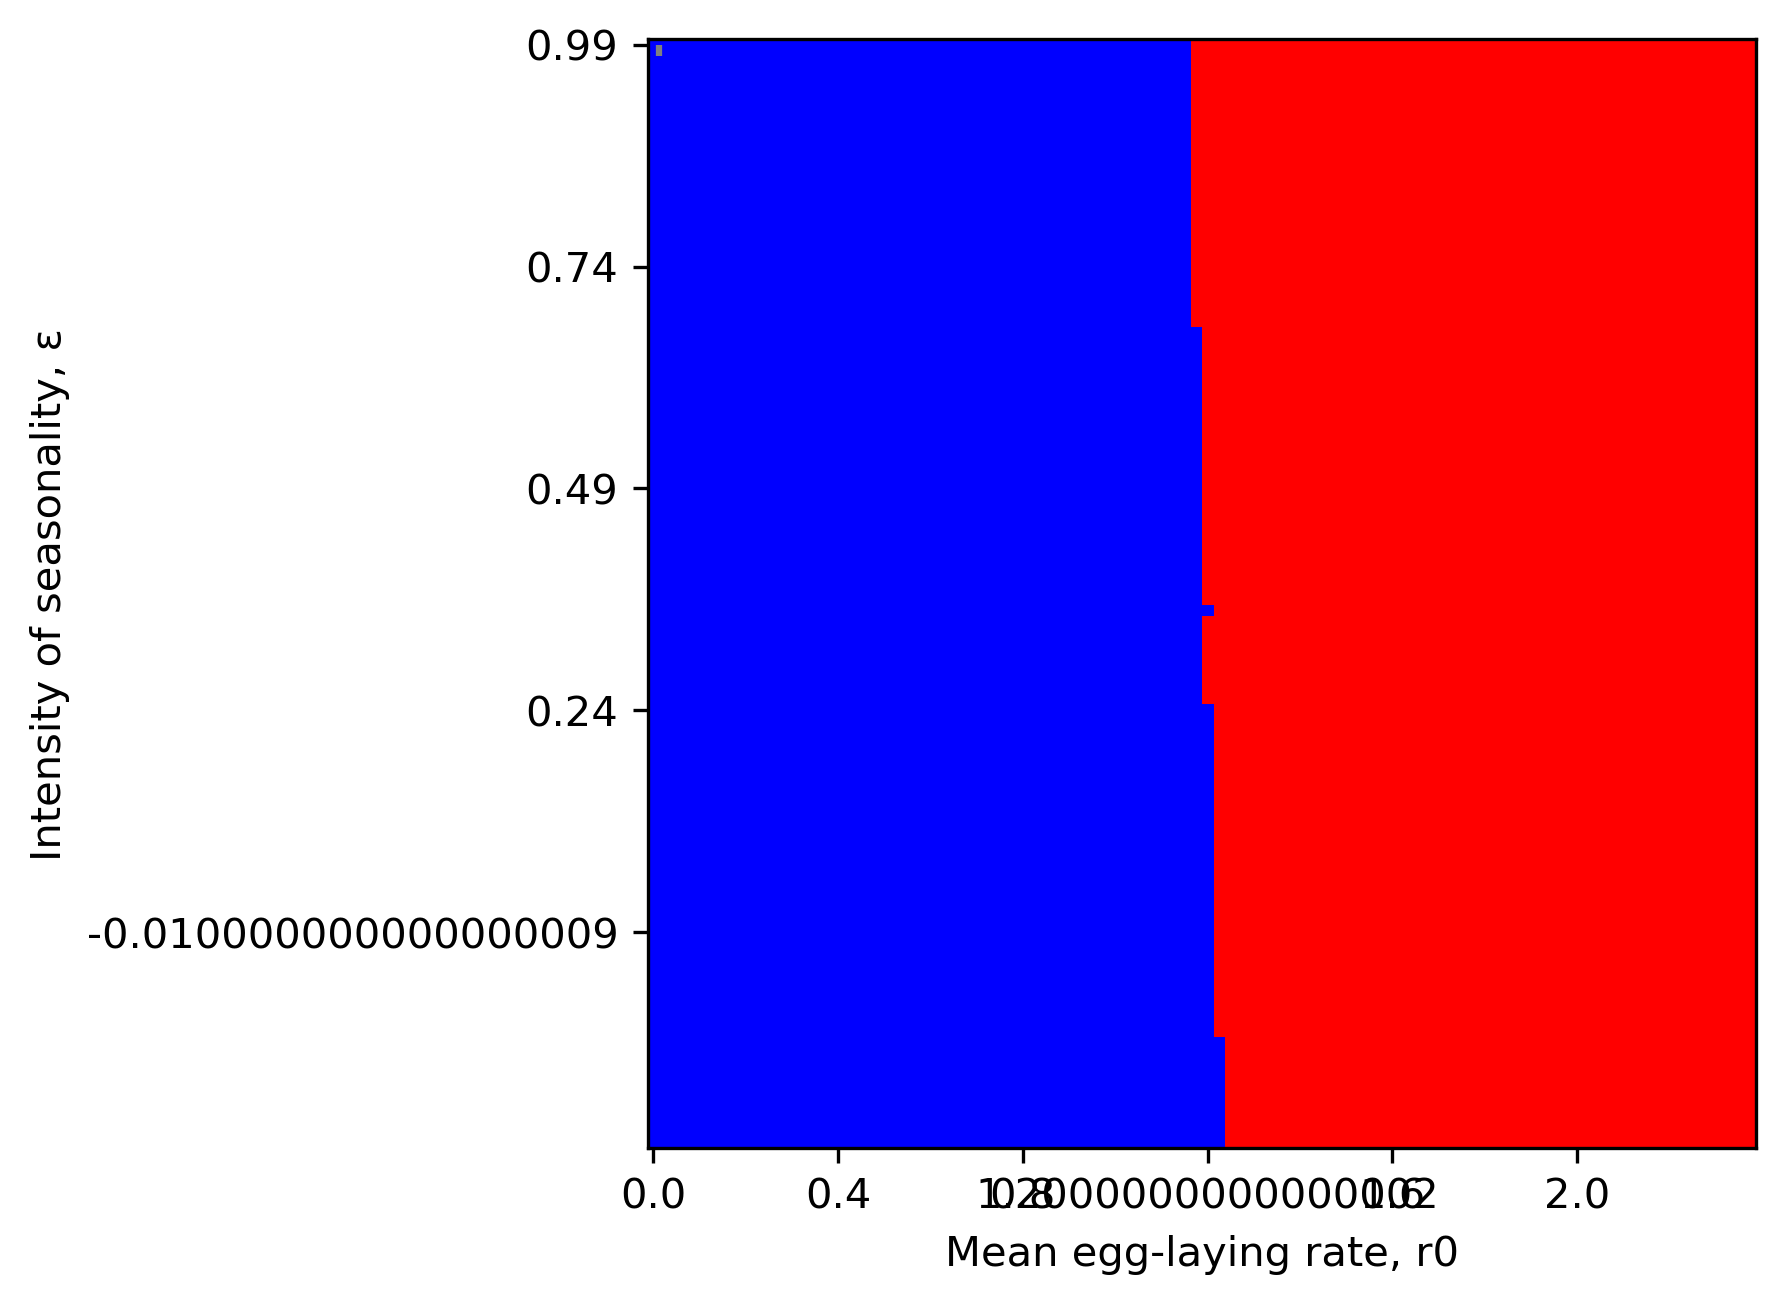

In [52]:
# Display the grid above
plt.figure(dpi=300)
plt.imshow(phaseSpaceGrid, interpolation='nearest', cmap="bwr")

numxTicks = 6
numyTicks = 5
plt.xticks(np.arange(0, gridWidth, gridWidth/numxTicks), np.linspace(r0min,r0max,numxTicks));
plt.yticks(np.arange(0, gridHeight, gridHeight/numyTicks), epsilon-np.linspace(epsilonmin,epsilonmax,numyTicks));

plt.vlines([r0minForSurvival], 0,1, linestyle="dashed", color="gray")

plt.xlabel("Mean egg-laying rate, r0")
plt.ylabel("Intensity of seasonality, ε")

#### Compare seasonality period and timing of max egg-laying
Other combinations may be checked simply by tweaking the variables used above, this case needs some slight modification so is included

In [55]:
# Population dynamics parameters
k = 1/4
dh = 1/2

# Set r0 relative to the minimum for survival from Prop 1
r0minForSurvival = 2 * dh * np.sqrt(k)
r0 = r0minForSurvival * 2

# Set epsilon relative to bound for high-intensity from Thm 2
epsilonc = 1-(2*dh * np.sqrt(k))/r0 # Above this seasonality is high-intensity
epsilon = 0.8*(epsilonc)

u0 = 0.13

In [60]:
# Set up the 2D array to store survival or collapse
gridHeight = 100
gridWidth = 100

phaseSpaceGrid = np.zeros([gridHeight, gridWidth])

# Set up parameter ranges for the axes
gammamax = 400
gammamin = 1
gammaRange = np.arange(gammamin,gammamax,(gammamax-gammamin)/gridWidth)

psiRange = np.arange(0,1,(1/gridHeight)) # No need for max here since it'll be set relative to epsilon in the loop

# Set how long to run the simulation for at each grid point
tMin = 0
tMax = 500
dt = 0.1
tMaxIndex = tMax/dt
tAxis = np.arange(tMin,tMax,dt)

In [61]:
for i in tqdm(range(len(epsilonRange))):
    # Create empty array to store the current row
    uSolns = [np.zeros(len(tAxis)) for i in range(0,len(psiRange))]
    
    gamma = gammaRange[i]
    
    # Run simulation for each u0 and store the results in the empty array
    for ii in range(0,len(psiRange)):
        r0 = psiRange[ii]*gamma
        ivpSol = solve_ivp(dudt, [tMin,tMax], [u0], t_eval=tAxis)
        uSolns[ii] = ivpSol.y[0]
            
    # Loop through the current column and set the value of the final grid according to survival or collapse
    for j in range(len(uSolns)):
        
        if uSolns[j][int(tMaxIndex)-1] > 0.1:
            phaseSpaceGrid[-i-1,j] = True
        else:
            phaseSpaceGrid[-i-1,j] = False

100%|█████████████████████████████████████████| 100/100 [02:05<00:00,  1.25s/it]


Text(0, 0.5, 'Duration of seasonality')

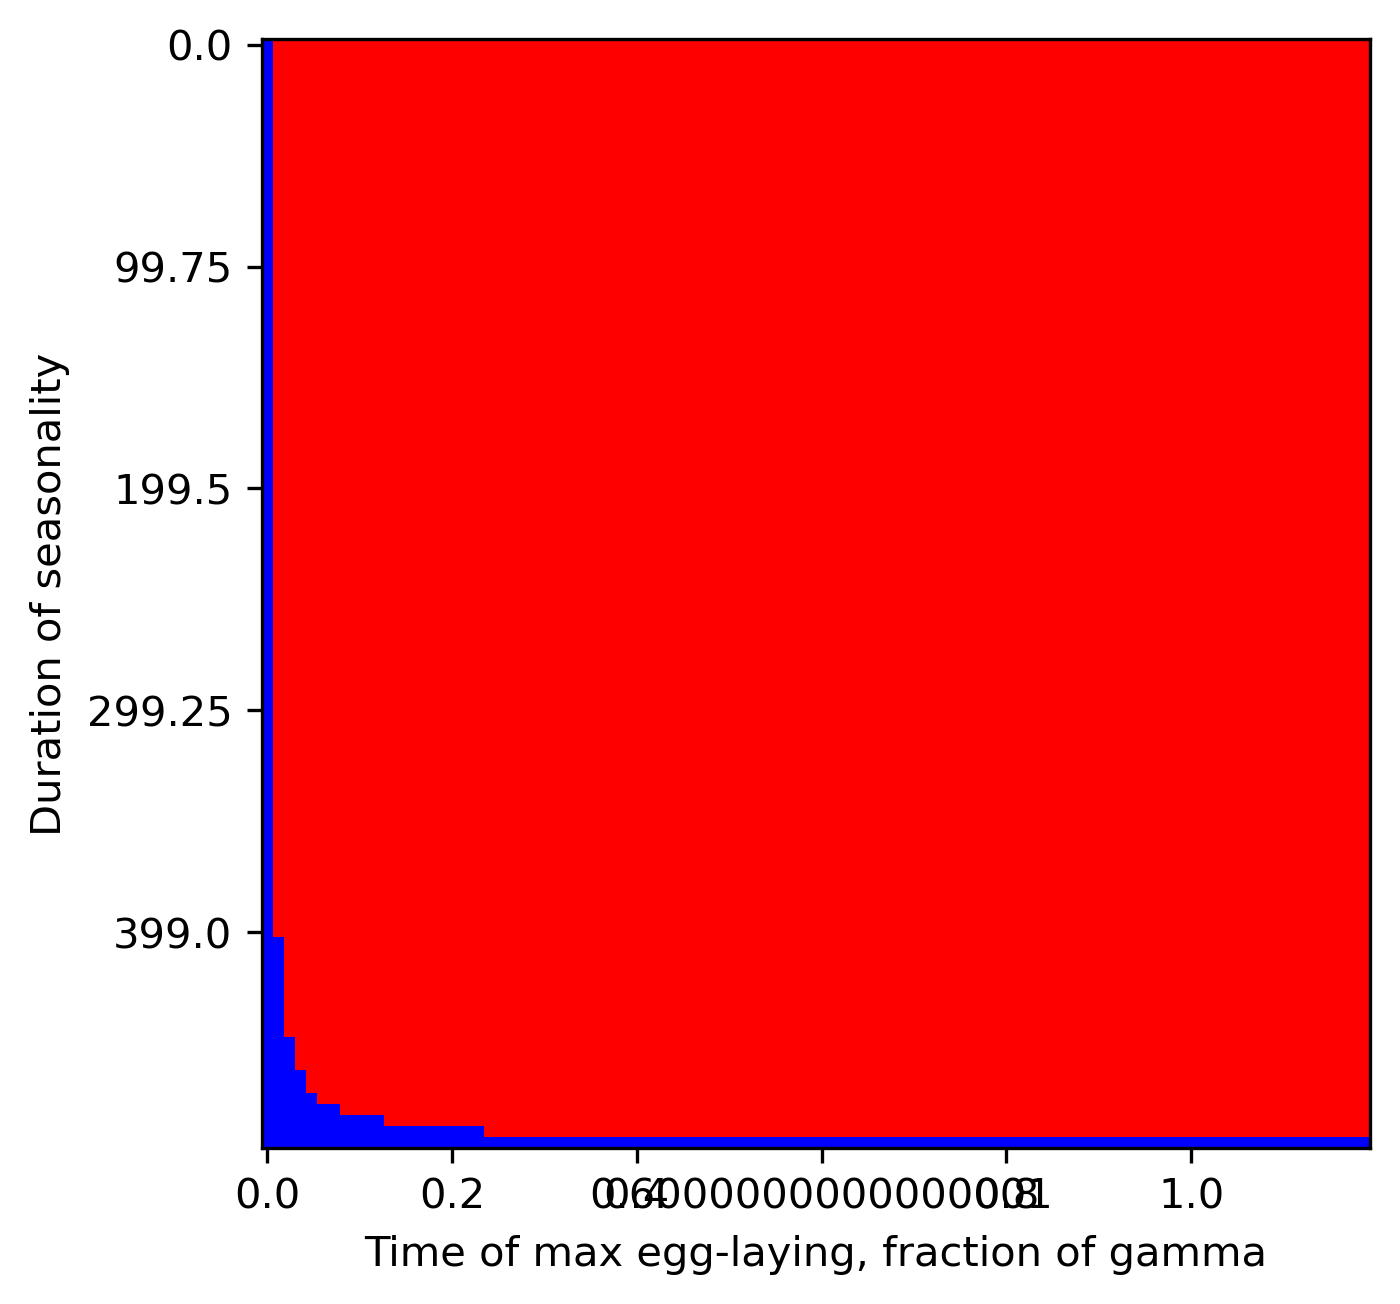

In [62]:
# Display the grid above
plt.figure(dpi=300)
plt.imshow(phaseSpaceGrid, interpolation='nearest', cmap="bwr")

numxTicks = 6
numyTicks = 5
plt.xticks(np.arange(0, gridWidth, gridWidth/numxTicks), np.linspace(0,1,numxTicks));
plt.yticks(np.arange(0, gridHeight, gridHeight/numyTicks), gammamax-np.linspace(gammamax,gammamin,numyTicks));


plt.xlabel("Time of max egg-laying, fraction of gamma")
plt.ylabel("Duration of seasonality")